In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [44]:
# Directory containing your amplitude files
file_dir = '/Users/macbookair/Desktop/ML4QS_Group125/data_aggregated/'
output_dir = '/Users/macbookair/Desktop/ML4QS_Group125/boxplots/pitch/'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get all amplitude files with .csv extension
file_paths = glob.glob(os.path.join(file_dir, 'pitch_time_*.csv'))

Delta t: 5
Plot saved to: /Users/macbookair/Desktop/ML4QS_Group125/boxplots/pitch/boxplot_dt_5.png


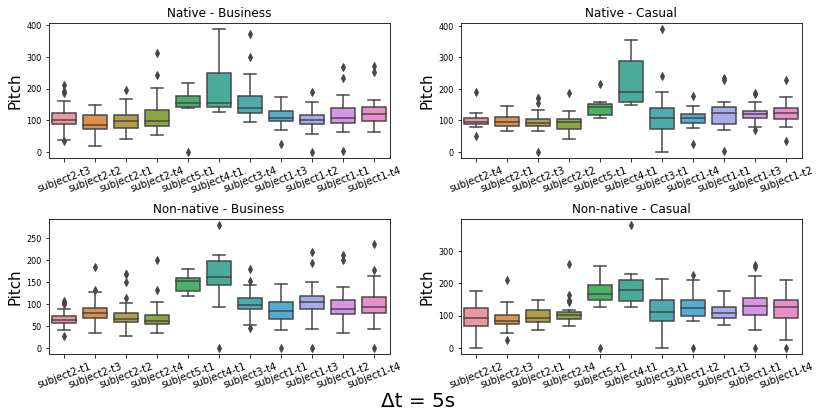

Delta t: 2
Plot saved to: /Users/macbookair/Desktop/ML4QS_Group125/boxplots/pitch/boxplot_dt_2.png


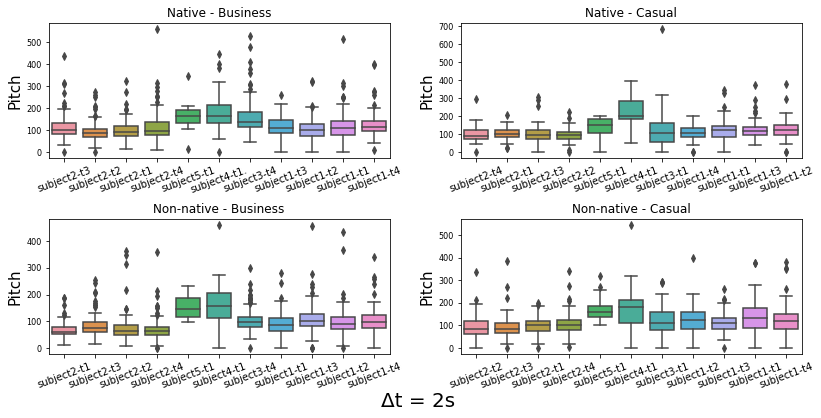

Delta t: 1
Plot saved to: /Users/macbookair/Desktop/ML4QS_Group125/boxplots/pitch/boxplot_dt_1.png


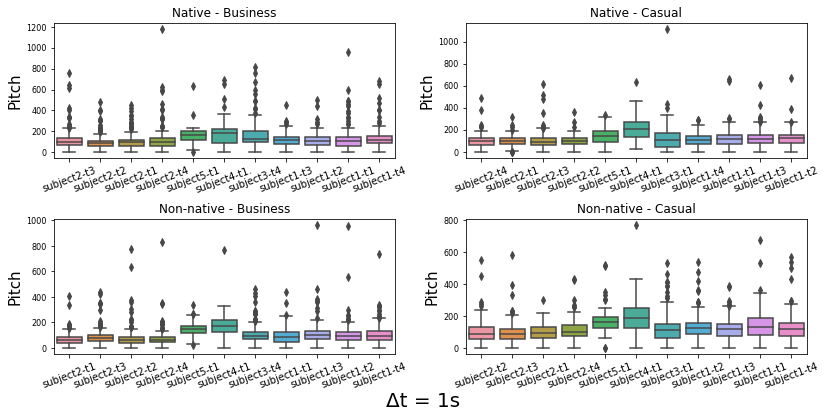

Delta t: 0.1
Plot saved to: /Users/macbookair/Desktop/ML4QS_Group125/boxplots/pitch/boxplot_dt_0.1.png


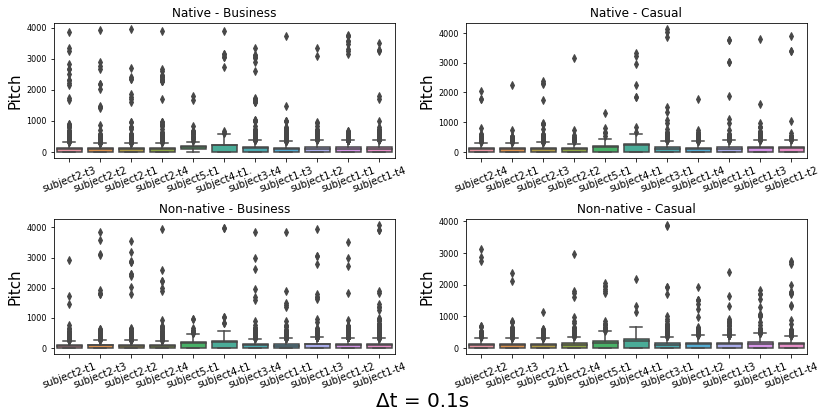

Delta t: 0.5
Plot saved to: /Users/macbookair/Desktop/ML4QS_Group125/boxplots/pitch/boxplot_dt_0.5.png


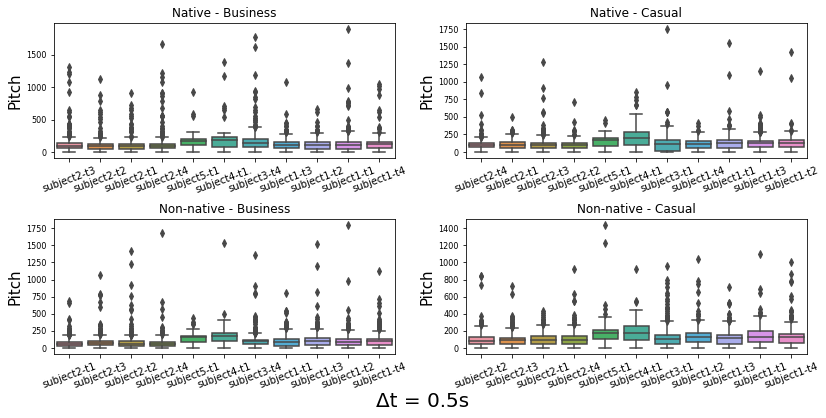

In [46]:
# Define native and non-native languages
native_languages = ['ch', 'tr', 'ru']
non_native_language = 'en'

# Loop through each file
for file_path in file_paths:
    # Extract the Δt value from the file name
    delta_t = os.path.basename(file_path).split('_')[2].replace('.csv', '')
    print(f'Delta t: {delta_t}')
    
    # Load the data
    df = pd.read_csv(file_path)
    
    # Get unique values for trials, participants, languages, and tones
    trials = df['script'].unique()
    participants = df['participant'].unique()
    languages = df['language'].unique()
    tones = df['tone'].unique()
    
    # Combine participant and script into a single column for easy plotting
    df['participant_script'] = df['participant'].astype(str) + '-' + df['script']
    
    # Create a 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # Adjust figsize to control overall plot size
    fig.tight_layout(pad=4.0)  # Adjust padding between plots
    
    # Flatten the axs array for easy indexing
    axs = axs.flatten()
    
    # Define the language-tone combinations to plot
    combinations = [
        ('native', 'bus'),
        ('native', 'casual'),
        ('non-native', 'bus'),
        ('non-native', 'casual')
    ]
    
    # Counter for subplot indexing
    plot_idx = 0
    
    # Loop through each combination
    for language_type, tone in combinations:
        if language_type == 'native':
            # Filter for native languages
            df_lang_tone = df[(df['tone'] == tone) & (df['language'].isin(native_languages))]
        else:
            # Filter for non-native language
            df_lang_tone = df[(df['tone'] == tone) & (df['language'] == non_native_language)]
        
        # Create boxplots with participant-script on the x-axis in the current subplot
        sns.boxplot(ax=axs[plot_idx], x='participant_script', y='pitch_mean', data=df_lang_tone)
        
        if tone == 'bus':
            axs[plot_idx].set_title(f'{language_type.capitalize()} - Business')
        else:
            axs[plot_idx].set_title(f'{language_type.capitalize()} - Casual')
        
        axs[plot_idx].set_xlabel("")  # Remove x-axis label
        axs[plot_idx].set_ylabel("Pitch", fontsize=15)
        axs[plot_idx].tick_params(axis='x', rotation=20, labelsize=10)
        axs[plot_idx].tick_params(axis='y', labelsize=8)
    
        # Increment the subplot index
        plot_idx += 1
    
    # Put a title on the whole plot at the bottom
    plt.figtext(0.5, 0.01, f'Δt = {delta_t}s', ha='center', fontsize=20)
    
    # Save the plot
    output_file_path = os.path.join(output_dir, f'boxplot_dt_{delta_t}.png')
    plt.savefig(output_file_path)
    print(f'Plot saved to: {output_file_path}')
    plt.show()
    # Close the plot to free memory
    plt.close(fig)